# A $1 Million Dollar Question You Can Solve With Data Science Today!

In [1]:
# from IPython import display 
# display.Image("https://www.onthemarket.com/content/wp-content/uploads/2016/01/2016-House-prices-lead.gif", width=600)

This is a Python Jupyter Notebook to demostrate an end-to-end process for a specific Data-Science problem on a specific dataset.

Before anything, let's import a bunch of pythoin libraries that we are going to use later in this notebook. You can always import more libraries here as needed!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# 🟥 Phase A: What Happened and Why? (EDA)
In this first phase your main goal is loading up the data into a Pandas dataframe and looking into it to understand your data, clean your data, and finally explore your data by performing some simple statistical analysis to discover patterns and ways to go in the next phase!

## 1️⃣ Step 1: Collecting Data
In this step we load the data into a panda data frame. Depending on the format of source data there are many ways to import data into a pandas dataframe. `read_csv` is one of the most popular ones to load data from flat files in csv format.

let's use `read_csv` function from pandas library (we renamed `Pandas` as `pd` for simplicity above, remember!) to load our source data file into a data-frame that we choose to call it `df`


In [3]:
# comment: loading data into a dataframe
df = pd.read_csv('./housing_prices_assignment.csv')

## 2️⃣ Step 2: Undestanding Data
In this step our objective is have an understanding of our data by looking at the generic characteristics of this dataframe such as: `number of rows`, `number of columns`, `list of column names`, `type of data values in each column`, `the distribution of values in the columns`, etc.

In [4]:
# let's take a look at the header of our new built dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# dataframe dimensions: number of rows & number of columns
df.shape

(1460, 81)

In [6]:
# list of column names
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# data types of the values in the columns. For example the data type of the vale stores in the first row of the "price" and "Address" columns
type(df['SalePrice'][0]), type(df['Neighborhood'][0])

(numpy.int64, str)

In [8]:
# well, fortunatelly `pandas` has some functions that provide an overview of the dataframe. Let's use a couple of them to understand the data better!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#here is another useful panda function to understand data:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


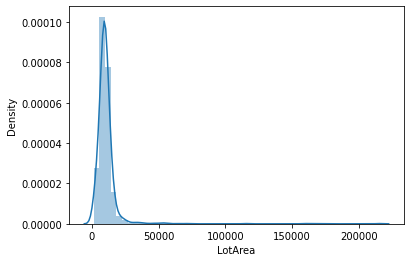

In [10]:
# if you are interested to go a bit deeper and understand more details about value distribution in each column, an easy way is 
# using visualization functions in the library `seaborn` (we called it `sns` above). Below is just one example, seaborn can do much more!
sns.distplot(df['LotArea'])

## 3️⃣ Step 3: Cleaning Data
Cleaning data is based on our understanding of data in the previous step. It could be multiple issues in data that needs to be cleaned such as `missing values`, `bad data`, `outliers`, etc. But here we keep it simple and focuse on one: `missing values`.

As you may have noticed from the outcome of our experiments in the previous step, there are some missing values in the data. 

In fact, the value of columns `Avg. Area Number of Rooms` is missing in 250 cases! We can address this issue multiple ways, depending on the situation. Below is two of the most popular approaches: (1) removing the rows with missing data and not worrying about them! , (2) replacing the missing values with the mean value of the existing values and hope for the best!

In [11]:
# let's take another look into our data AFTER cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# Find Columns which more than half of their values are null and drop them
# columns with more than half of values null
null_columns = df.isna().sum()[df.isna().sum() > df.shape[0]/2].index.to_list()

# drop columns with too many null values
df_cleaned = df.drop(labels=null_columns, axis=1)

In [13]:
# fill numerical values with mean value for numerical features
df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].mean(), inplace=True)
df_cleaned['MasVnrArea'].fillna(df_cleaned['MasVnrArea'].mean(), inplace=True)
df_cleaned['GarageYrBlt'].fillna(df_cleaned['GarageYrBlt'].mean(), inplace=True)

The remaining features with null values are categorical. We replace null values in this columns by most commot value

In [14]:
# create list of remaining columns with null values
cat_col = df_cleaned[df_cleaned.isna().sum()[df_cleaned.isna().sum() > 0].index.to_list()].columns

# fill null values with most common value
for col in cat_col:
  most_common_value = df_cleaned[col].value_counts().idxmax()
  df_cleaned[col].fillna(most_common_value, inplace=True)

In [ ]:
# check to see if cleaning is done
df_cleaned.info()

## 4️⃣ Step 4: Statistical Analysis
We had to do all the previous steps in this phase to be able to do this step and addressing the question of this phase: What Happened? Why?

This can be like opening a can of worms though! 🥫🐛🐛🐛 There are countless experiments you can do as needed here. It all goes back to the questions you ask!

Below is only a few questions/examples of the most popular statistical analysis that can be done. But keep in mind that you have no limit to do more! We are fortunate enough to live in a time that a lot of statistical analysis functions has been built in to the python libraries like pandas and seaborn and all you need to do is learn how to use them! Piece's cake! 🍰

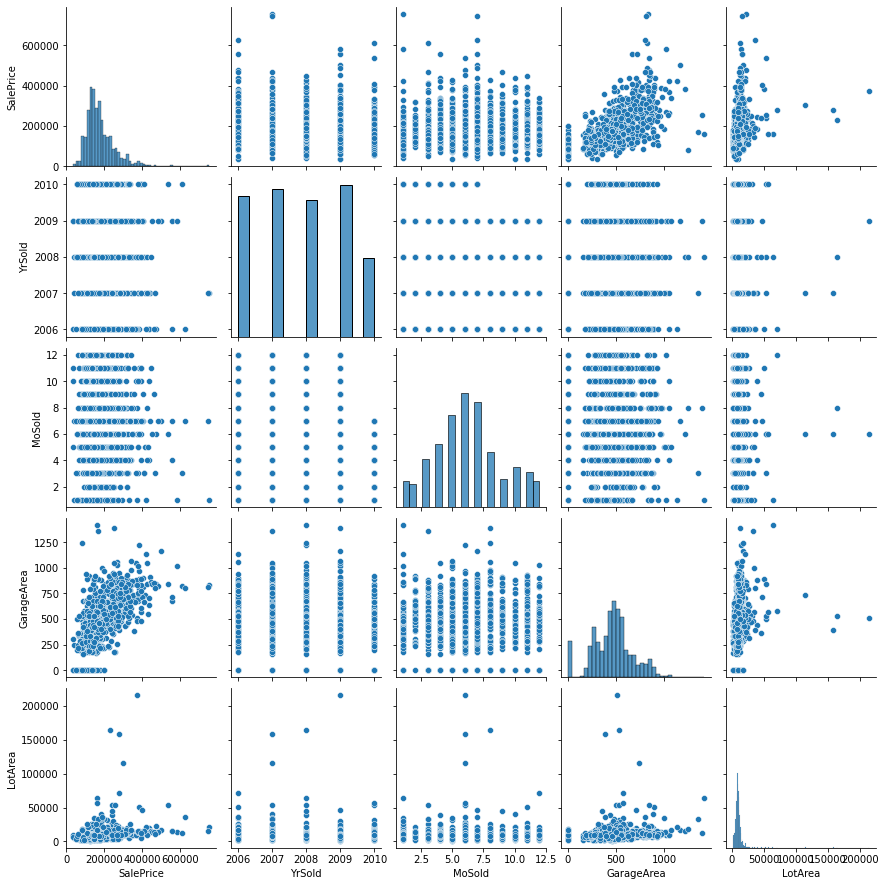

In [16]:
# Question: How is the correlation between each pairs of columns?
sns.pairplot(df_cleaned[['SalePrice', 'YrSold', 'MoSold', 'GarageArea', 'LotArea']])

# 🟥🟥 Phase B: What Will Happen? (AI Models)
The objective in this phase is using Machinea Learning algorithms (through python libraries) to build a predictive model that can get a few inout features such as the number of bedrooms, the number of rooms, income level within the area and tell us if this given house is likly to be priced equal or greater than $1M dollars!

## 5️⃣ Step 5: Predictive Modeling

In [17]:
# let's take a look at all available columns
df_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [18]:
# marking input "features" as X and the "target label" as y
feature_names = ['LotArea', 'YearBuilt', 'YrSold', '1stFlrSF']
X = df_cleaned[feature_names]
y = df_cleaned['SalePrice']

In [19]:
#import the required library
from sklearn.model_selection import train_test_split

# splitting entire data randomly into test (30%) and trainig (70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
#import the required library
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() #define model

model.fit(X_train, y_train) #fit the model to the data (AKA TRAINING)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(model.score(X_train, y_train))) #accuracy on training data
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test))) #accuracy on test data

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.76


In [21]:
# define a new input case with all of the requred features
# for simplicity we pick one row from existing data, 
# but it doesn't need to be from existing data! Pass any values, the model will make a prediction!
# required features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']

newInputs = list(df_cleaned.loc[90,feature_names]) 

Xnew = [newInputs]

# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Real=%s" % (Xnew[0], df_cleaned.loc[90,'SalePrice']))
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[7200, 1950, 2006, 1040], Real=109900
X=[7200, 1950, 2006, 1040], Predicted=109521.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


# 🟥🟥🟥 Phase C: Are You Sure? (Model Evaluation)
The objective of this phase is evaluating the model and make sure it works! There are various ways and metrics to evaluate and quantify the performance of a model. 

Here in this `Classification` example we focus on a couple of most important metrics: (1) Confusion Metrix and (2) ROC Curve

In other types of problems such as `Regression` and `Unsupervised Learning` there are other metrics that one can use for model evaluation. You will learn more about them in the assignment.

In [24]:
# predict prices for test data for calculating evaluation metrics
y_pred = model.predict(X_test)

**R2 Score**

 (coefficient of determination) regression score function.
**bold text**
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a
score of 0.0.

In [22]:
# R2 Score
from sklearn.metrics import r2_score

print('R2 Score of model on test data: {:.2f}'.format(r2_score(y_test, y_pred))) 

R2 Score of model on test data: 0.76


**Root mean squared error**

Shows the amount of difference between predicted values and true values

In [23]:
from sklearn.metrics import mean_squared_error

print('Root Mean Squared Error of model on test data: {:.0f}'.format(mean_squared_error(y_test, y_pred, squared=False))) 

Root Mean Squared Error of model on test data: 41276
